<a href="https://colab.research.google.com/github/rdwnhadi/LearningDataScience/blob/main/Salinan_dari_Klasifikasi_Darah_4_Kategori(Unfinished).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tugas Akhir Dicoding

Nama : Ridwan Hadi Kusuma

In [1]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#ekstrak file zip

import zipfile,os
local_zip = '/content/dataset2-master.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/bloodcell')
zip_ref.close()

In [3]:
#cek direktori/folder
os.listdir('/tmp/bloodcell/dataset2-master/images/TRAIN')

['LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL', 'EOSINOPHIL']

In [4]:
#import fungsi direktori
import os
import os.path
from pathlib import Path
import glob

train_path = Path('/tmp/bloodcell/dataset2-master/images/TRAIN')
test_path = Path('/tmp/bloodcell/dataset2-master/images/TEST')
val_path = Path('/tmp/bloodcell/dataset2-master/images/TEST_SIMPLE')

In [5]:
train_img_path = list(train_path.glob(r"**/*.jpeg"))
test_img_path = list(test_path.glob(r"**/*.jpeg"))
val_img_path = list(val_path.glob(r"**/*.jpeg"))

In [6]:
Train_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],train_img_path))

In [7]:
print("EOSINOPHIL: ", Train_JPG_Labels.count("EOSINOPHIL"))
print("LYMPHOCYTE: ", Train_JPG_Labels.count("LYMPHOCYTE"))
print("MONOCYTE: ", Train_JPG_Labels.count("MONOCYTE"))
print("NEUTROPHIL: ", Train_JPG_Labels.count("NEUTROPHIL"))

EOSINOPHIL:  2497
LYMPHOCYTE:  2483
MONOCYTE:  2478
NEUTROPHIL:  2499


In [8]:
Test_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],test_img_path))

In [9]:
print("EOSINOPHIL: ", Test_JPG_Labels.count("EOSINOPHIL"))
print("LYMPHOCYTE: ", Test_JPG_Labels.count("LYMPHOCYTE"))
print("MONOCYTE: ",Test_JPG_Labels.count("MONOCYTE"))
print("NEUTROPHIL: ", Test_JPG_Labels.count("NEUTROPHIL"))

EOSINOPHIL:  623
LYMPHOCYTE:  620
MONOCYTE:  620
NEUTROPHIL:  624


In [10]:
Val_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],val_img_path))

In [11]:
print("EOSINOPHIL: ", Val_JPG_Labels .count("EOSINOPHIL"))
print("LYMPHOCYTE: ", Val_JPG_Labels .count("LYMPHOCYTE"))
print("MONOCYTE: ",Val_JPG_Labels .count("MONOCYTE"))
print("NEUTROPHIL: ", Val_JPG_Labels .count("NEUTROPHIL"))

EOSINOPHIL:  13
LYMPHOCYTE:  6
MONOCYTE:  4
NEUTROPHIL:  48


In [12]:
# membuat image data generator
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRANSFORMATION TO SERIES STRUCTURE¶

In [13]:
train_img_path_Series = pd.Series(train_img_path,name="JPG").astype(str)

In [14]:
Train_JPG_Labels_Series = pd.Series(Train_JPG_Labels,name="CATEGORY")

In [15]:
test_img_path_Series = pd.Series(test_img_path,name="JPG").astype(str)

In [16]:
Test_JPG_Labels_Series = pd.Series(Test_JPG_Labels,name="CATEGORY")

In [17]:
val_img_path_Series = pd.Series(val_img_path,name="JPG").astype(str)

In [18]:
Val_JPG_Labels_Series = pd.Series(Val_JPG_Labels,name="CATEGORY")

TRANSFORMATION TO DATAFRAME STRUCTURE

In [19]:
Main_Train_Data = pd.concat([train_img_path_Series,Train_JPG_Labels_Series],axis=1)

In [20]:
print(Main_Train_Data.head(-1))

                                                    JPG    CATEGORY
0     /tmp/bloodcell/dataset2-master/images/TRAIN/LY...  LYMPHOCYTE
1     /tmp/bloodcell/dataset2-master/images/TRAIN/LY...  LYMPHOCYTE
2     /tmp/bloodcell/dataset2-master/images/TRAIN/LY...  LYMPHOCYTE
3     /tmp/bloodcell/dataset2-master/images/TRAIN/LY...  LYMPHOCYTE
4     /tmp/bloodcell/dataset2-master/images/TRAIN/LY...  LYMPHOCYTE
...                                                 ...         ...
9951  /tmp/bloodcell/dataset2-master/images/TRAIN/EO...  EOSINOPHIL
9952  /tmp/bloodcell/dataset2-master/images/TRAIN/EO...  EOSINOPHIL
9953  /tmp/bloodcell/dataset2-master/images/TRAIN/EO...  EOSINOPHIL
9954  /tmp/bloodcell/dataset2-master/images/TRAIN/EO...  EOSINOPHIL
9955  /tmp/bloodcell/dataset2-master/images/TRAIN/EO...  EOSINOPHIL

[9956 rows x 2 columns]


In [21]:
Main_Test_Data = pd.concat([test_img_path_Series,Test_JPG_Labels_Series],axis=1)

In [22]:
print(Main_Test_Data.head(-1))

                                                    JPG    CATEGORY
0     /tmp/bloodcell/dataset2-master/images/TEST/LYM...  LYMPHOCYTE
1     /tmp/bloodcell/dataset2-master/images/TEST/LYM...  LYMPHOCYTE
2     /tmp/bloodcell/dataset2-master/images/TEST/LYM...  LYMPHOCYTE
3     /tmp/bloodcell/dataset2-master/images/TEST/LYM...  LYMPHOCYTE
4     /tmp/bloodcell/dataset2-master/images/TEST/LYM...  LYMPHOCYTE
...                                                 ...         ...
2481  /tmp/bloodcell/dataset2-master/images/TEST/EOS...  EOSINOPHIL
2482  /tmp/bloodcell/dataset2-master/images/TEST/EOS...  EOSINOPHIL
2483  /tmp/bloodcell/dataset2-master/images/TEST/EOS...  EOSINOPHIL
2484  /tmp/bloodcell/dataset2-master/images/TEST/EOS...  EOSINOPHIL
2485  /tmp/bloodcell/dataset2-master/images/TEST/EOS...  EOSINOPHIL

[2486 rows x 2 columns]


In [23]:
Main_Val_Data = pd.concat([val_img_path_Series,Val_JPG_Labels_Series],axis=1)

In [24]:
print(Main_Val_Data.head(-1))

                                                  JPG    CATEGORY
0   /tmp/bloodcell/dataset2-master/images/TEST_SIM...  LYMPHOCYTE
1   /tmp/bloodcell/dataset2-master/images/TEST_SIM...  LYMPHOCYTE
2   /tmp/bloodcell/dataset2-master/images/TEST_SIM...  LYMPHOCYTE
3   /tmp/bloodcell/dataset2-master/images/TEST_SIM...  LYMPHOCYTE
4   /tmp/bloodcell/dataset2-master/images/TEST_SIM...  LYMPHOCYTE
..                                                ...         ...
65  /tmp/bloodcell/dataset2-master/images/TEST_SIM...  EOSINOPHIL
66  /tmp/bloodcell/dataset2-master/images/TEST_SIM...  EOSINOPHIL
67  /tmp/bloodcell/dataset2-master/images/TEST_SIM...  EOSINOPHIL
68  /tmp/bloodcell/dataset2-master/images/TEST_SIM...  EOSINOPHIL
69  /tmp/bloodcell/dataset2-master/images/TEST_SIM...  EOSINOPHIL

[70 rows x 2 columns]


Shuffling

In [25]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)
Main_Test_Data = Main_Test_Data.sample(frac=1).reset_index(drop=True)
Main_Val_Data = Main_Val_Data.sample(frac=1).reset_index(drop=True)

Determination train and test data

In [26]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [27]:
Train_IMG_Set = train_datagen.flow_from_dataframe(dataframe=Main_Train_Data,
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="categorical",
                                                   subset="training",
                                                   seed=42,
                                                   batch_size=32,
                                                   target_size=(220,220))

Found 9957 validated image filenames belonging to 4 classes.


In [28]:
Test_IMG_Set = test_datagen.flow_from_dataframe(dataframe=Main_Test_Data,
                                                            x_col="JPG",
                                                            y_col="CATEGORY",
                                                            color_mode="rgb",
                                                            class_mode="categorical",
                                                            seed=42,
                                                            batch_size=32,
                                                            target_size=(220,220))

Found 2487 validated image filenames belonging to 4 classes.


In [29]:
Val_IMG_Set = val_datagen.flow_from_dataframe(dataframe = Main_Val_Data,
                                                                  x_col="JPG",
                                                                  y_col="CATEGORY",
                                                                  color_mode="rgb",
                                                                  class_mode="categorical",
                                                                  seed=42,
                                                                  subset="validation",
                                                                  batch_Size=32,
                                                                  target_size=(220,200))

Found 0 validated image filenames belonging to 4 classes.


In [30]:
for data_batch,label_batch in Train_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 220, 220, 3)
LABEL SHAPE:  (32, 4)


In [31]:
for data_batch,label_batch in Val_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (0, 220, 200, 3)
LABEL SHAPE:  (0, 4)


In [32]:
for data_batch,label_batch in Test_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 220, 220, 3)
LABEL SHAPE:  (32, 4)


In [33]:
print("TRAIN: ")
print(Train_IMG_Set.class_indices)
print(Train_IMG_Set.classes[0:5])
print(Train_IMG_Set.image_shape)
print("---"*20)
print("VALIDATION: ")
print(Val_IMG_Set.class_indices)
print(Val_IMG_Set.classes[0:5])
print(Val_IMG_Set.image_shape)
print("---"*20)
print("TEST: ")
print(Test_IMG_Set.class_indices)
print(Test_IMG_Set.classes[0:5])
print(Test_IMG_Set.image_shape)

TRAIN: 
{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}
[1, 0, 3, 3, 3]
(220, 220, 3)
------------------------------------------------------------
VALIDATION: 
{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}
[]
(220, 200, 3)
------------------------------------------------------------
TEST: 
{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}
[0, 3, 3, 2, 0]
(220, 220, 3)


In [34]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D
Model = Sequential()

Model.add(SeparableConv2D(32,3,
                          activation="relu", input_shape=(220,220,3)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2)))

#
Model.add(SeparableConv2D(64,3,
                 activation="relu"))
Model.add(SeparableConv2D(128,(3,3),
                 activation="relu"))
Model.add(Dropout(0.5))
Model.add(MaxPooling2D((2)))

#
Model.add(SeparableConv2D(64,3,
                 activation="relu"))
Model.add(SeparableConv2D(128,3,
                 activation="relu"))
Model.add(Dropout(0.5))
Model.add(GlobalAveragePooling2D())

#
Model.add(Flatten())
Model.add(Dense(256,
                activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(4,
                activation="softmax"))

In [35]:
Call_Back = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=5,mode="max")

In [36]:
Model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

In [37]:
history = Model.fit(Train_IMG_Set,
                      validation_data=Test_IMG_Set,
                      callbacks=Call_Back,
                      batch_size=10,
                      epochs=20)

Epoch 1/20
312/312 [==============================] - 189s 517ms/step - loss: 1.3649 - accuracy: 0.2768 - val_loss: 1.3800 - val_accuracy: 0.2493
Epoch 2/20
312/312 [==============================] - 162s 518ms/step - loss: 1.1330 - accuracy: 0.4824 - val_loss: 1.0296 - val_accuracy: 0.6031
Epoch 3/20
312/312 [==============================] - 162s 519ms/step - loss: 0.8195 - accuracy: 0.6490 - val_loss: 0.8787 - val_accuracy: 0.6425
Epoch 4/20
312/312 [==============================] - 162s 518ms/step - loss: 0.5181 - accuracy: 0.7850 - val_loss: 1.5226 - val_accuracy: 0.5296
Epoch 5/20
312/312 [==============================] - 160s 513ms/step - loss: 0.3663 - accuracy: 0.8572 - val_loss: 0.3836 - val_accuracy: 0.8380
Epoch 6/20
312/312 [==============================] - 161s 517ms/step - loss: 0.2870 - accuracy: 0.8939 - val_loss: 0.5719 - val_accuracy: 0.8183
Epoch 7/20
312/312 [==============================] - 161s 515ms/step - loss: 0.2428 - accuracy: 0.9111 - val_loss: 1.1831 -

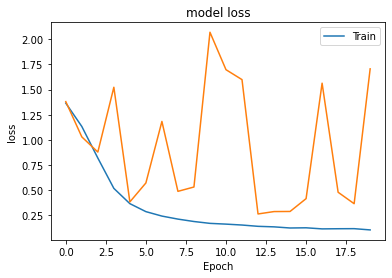

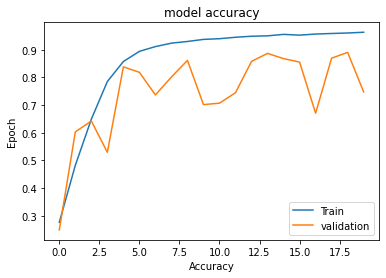

In [38]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(['Train', ],loc="upper right")
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
plt.legend(['Train', 'validation'],loc="lower right")
plt.show()

In [48]:
from tensorflow.keras.models import load_model

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
#memprediksi gambar
path = fn
img = image.load_img(path, target_size=(150,150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

print (fn)

print (classes) # untuk mengecek secara manual

#setcode agar dapat mem-print hasil klasifikasi
EOSINOPHIL = np.array([[0, 1, 0, 0]])
LYMPHOCYTE = np.array([[0, 0, 1, 0]])
MONOCYTE = np.array([[1, 0, 0, 0]])
NEUTROPHIL = np.array([[0, 0, 0, 1]])
comparison_EOSINOPHIL = classes==EOSINOPHIL
equal_arrays_EOSINOPHIL = comparison_EOSINOPHIL.all()
comparison_LYMPHOCYTE = classes==LYMPHOCYTE
equal_arrays_LYMPHOCYTE = comparison_LYMPHOCYTE.all()
comparison_MONOCYTE = classes==MONOCYTE
equal_arrays_MONOCYTE = comparison_MONOCYTE.all()
  
if equal_arrays_EOSINOPHIL:
   print('This is EOSINOPHIL!')
elif equal_arrays_LYMPHOCYTE:
   print('This is LYMPHOCYTE!')
elif equal_arrays_MONOCYTE:
   print('This is MONOCYTE!')
else:
   print('This is NEUTROPHIL!')

NameError: ignored

In [40]:
convert = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model =convert.convert()

NameError: ignored

In [ ]:
with tf.io.gfile.GFile('model.tflite','wb') as f:
  f.write(tflite_model)